In this file, I'll try to analize the video with hidden epilepsy hazard - police flshing lights.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2 as cv

import downloader as d 
import video as v

from typing import Tuple, Union
from numpy.typing import NDArray
from dataclasses import dataclass
from collections import deque

from importlib import reload

In [3]:
def get_video(path: str) -> Tuple[NDArray, int]:
    vid = cv.VideoCapture(path)
    fps = vid.get(cv.CAP_PROP_FPS)
    #video = np.fromiter(vid, np.ndarray)
    frames = []
    ret = True
    while ret:
        ret, img = vid.read() # read one frame from the 'capture' object; img is (H, W, C)
        if ret:
            img = cv.resize(src=img, dsize=(100,100))
            img = cv.cvtColor(img, cv.COLOR_BGR2HLS)
            frames.append(img)
    # dimensions (T, H, W, C)
    return np.stack(frames, axis=0), int(round(fps))

def get_vid_df(path: str) -> pd.DataFrame:
    vid,fps = get_video(path)
    frames = vid.shape[0]
    height = vid.shape[1]
    width = vid.shape[2]
    df = pd.DataFrame(vid.reshape((-1,3)))
    df['frame'] = df.index // (width * height)
    df['x'] = df.index % width
    df['y'] = df.index // width % height
    df['second'] = df.frame // fps
    df = df.set_index(['frame','y','x']).rename(columns={
        0:'hue',
        1:'lightness',
        2:'saturation',
    })
    df.attrs['fps'] = fps
    return df

### Police car. Hidden Hazard.

In [4]:
path = 'videos/Car flips over bridge following police pursuit.mp4'

In [5]:
arr = get_video(path)

In [6]:
df = get_vid_df(path)

In [7]:
lightness_series = df.groupby('frame').lightness.mean()

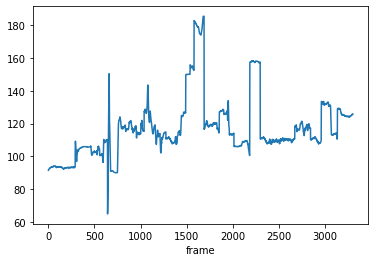

In [8]:
lightness_series.plot();

In [9]:
lightness_df = lightness_series.to_frame()
lightness_df['next_frame'] = lightness_df.lightness.shift(1)
lightness_df['difference'] = lightness_df.next_frame - lightness_df.lightness

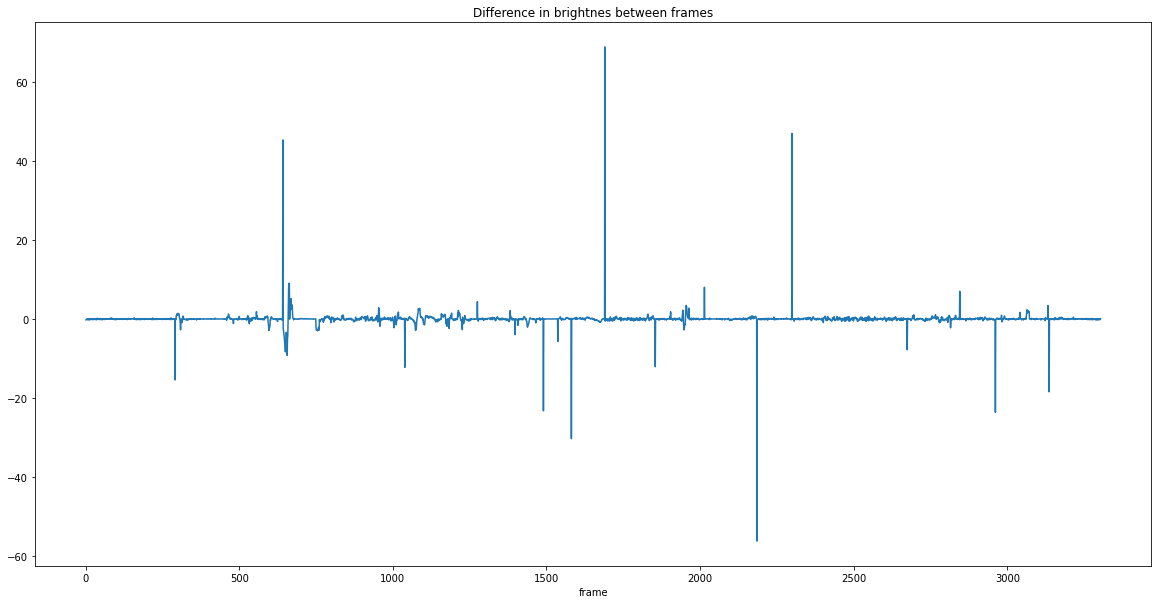

In [10]:
plt.figure(figsize=(20,10))
lightness_df.loc[:, 'difference'].plot()
plt.title('Difference in brightnes between frames')
plt.show()

In [17]:
df.head()

hue  lightness  saturation  second
frame y x                                    
0     0 0    0        244           0       0
        1    0        244           0       0
        2    0        244           0       0
        3    0        244           0       0
        4    0        244           0       0

### Cute animals. No hazard
Check how normal video looks

In [12]:
path = 'videos/little hens and dog.mp4'

In [13]:
df = get_vid_df(path)

<AxesSubplot: xlabel='frame'>

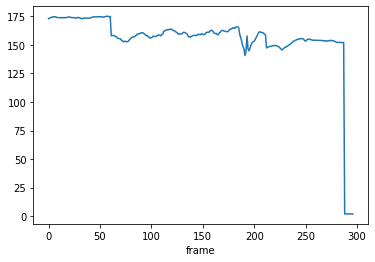

In [14]:
df.groupby('frame').lightness.mean().plot()

<AxesSubplot: xlabel='frame'>

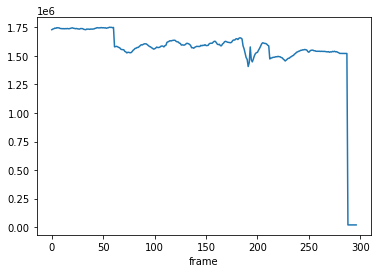

In [15]:
df.groupby('frame').lightness.sum().plot()

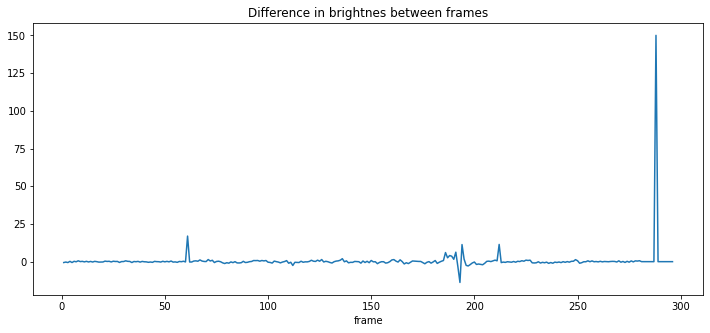

In [16]:
lightness_series = df.groupby('frame').lightness.mean()
lightness_df = lightness_series.to_frame()
lightness_df['next_frame'] = lightness_df.lightness.shift(1)
lightness_df['difference'] = lightness_df.next_frame - lightness_df.lightness

plt.figure(figsize=(12,5))
lightness_df.loc[:, 'difference'].plot()
plt.title('Difference in brightnes between frames')
plt.show()


### Epilepsy warning video

<AxesSubplot: xlabel='frame'>

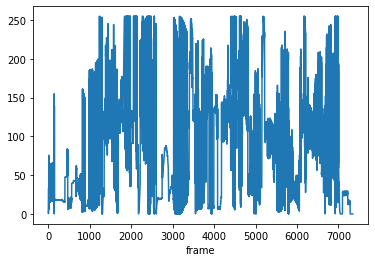

In [18]:
path = 'videos/Delete & Killshot - Disco Weapon [Epilepsy Warning].mp4'
df = get_vid_df(path)
df.groupby('frame').lightness.mean().plot()

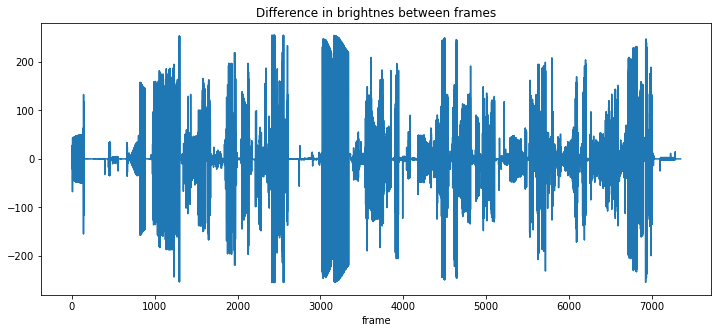

In [19]:
lightness_series = df.groupby('frame').lightness.mean()
lightness_df = lightness_series.to_frame()
lightness_df['next_frame'] = lightness_df.lightness.shift(1)
lightness_df['difference'] = lightness_df.next_frame - lightness_df.lightness

plt.figure(figsize=(12,5))
lightness_df.loc[:, 'difference'].plot()
plt.title('Difference in brightnes between frames')
plt.show()

In [20]:
df.attrs['fps']

30

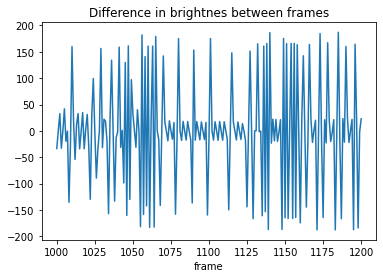

In [21]:
# closser look approx. 7 seconds of video
lightness_df.loc[1000:1200, 'difference'].plot()
plt.title('Difference in brightnes between frames')
plt.show()

Text(0.5, 1.0, 'Same seconds in actual lightness')

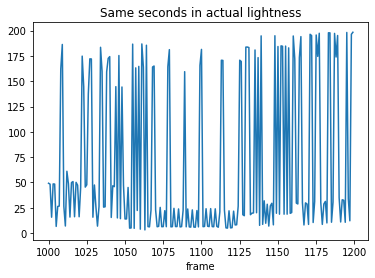

In [23]:
df.groupby('frame').lightness.mean()[1000:1200].plot()
plt.title('Same seconds in actual lightness')

### Paparazzi video. Hidden Hazard

<AxesSubplot: xlabel='frame'>

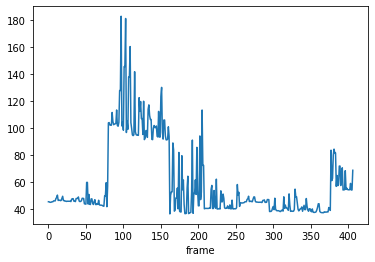

In [24]:
path = 'videos/Paparazzi flashes.mp4'
df = get_vid_df(path)
df.groupby('frame').lightness.mean().plot()

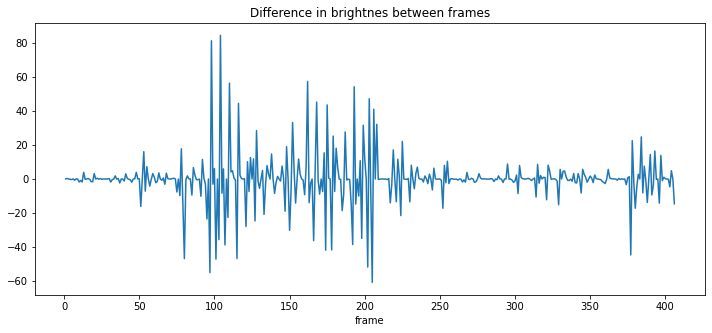

In [25]:
lightness_series = df.groupby('frame').lightness.mean()
lightness_df = lightness_series.to_frame()
lightness_df['next_frame'] = lightness_df.lightness.shift(1)
lightness_df['difference'] = lightness_df.next_frame - lightness_df.lightness

plt.figure(figsize=(12,5))
lightness_df.loc[:, 'difference'].plot()
plt.title('Difference in brightnes between frames')
plt.show()

### Lightnings. Hidden Hazard

<AxesSubplot: xlabel='frame'>

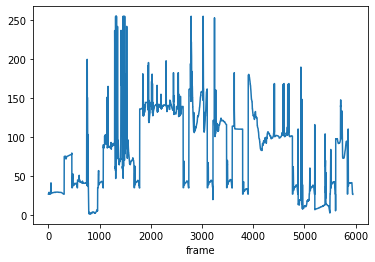

In [27]:
path = 'videos/Top 10 Dangerous Lightning Strikes Thunder recorded on Camera (HIGH VOLTAGE!!).mp4'
df = get_vid_df(path)
df.groupby('frame').lightness.mean().plot()

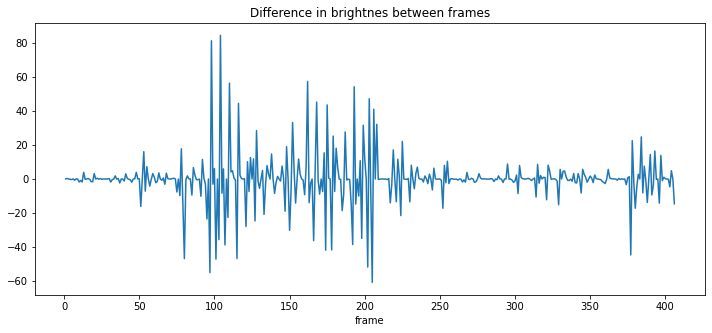

In [26]:
lightness_series = df.groupby('frame').lightness.mean()
lightness_df = lightness_series.to_frame()
lightness_df['next_frame'] = lightness_df.lightness.shift(1)
lightness_df['difference'] = lightness_df.next_frame - lightness_df.lightness

plt.figure(figsize=(12,5))
lightness_df.loc[:, 'difference'].plot()
plt.title('Difference in brightnes between frames')
plt.show()

Superman Video. We'll see now if it has a epilepsy hazard or not

<AxesSubplot: xlabel='frame'>

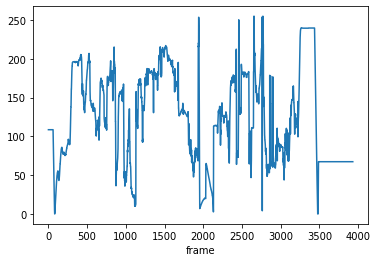

In [27]:
path = 'videos/Superman 80th Anniversary Animated Short  @dckids.mp4'
df = get_vid_df(path)
df.groupby('frame').lightness.mean().plot()

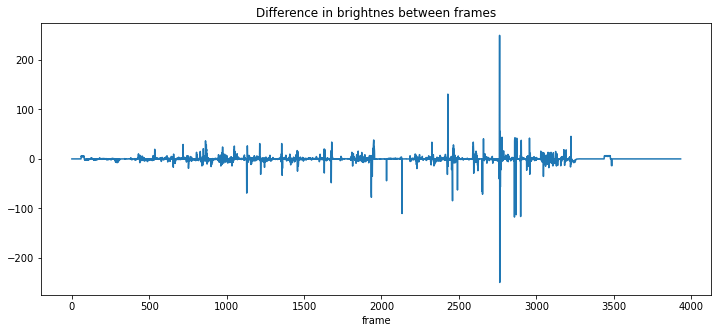

In [28]:
lightness_series = df.groupby('frame').lightness.mean()
lightness_df = lightness_series.to_frame()
lightness_df['next_frame'] = lightness_df.lightness.shift(1)
lightness_df['difference'] = lightness_df.next_frame - lightness_df.lightness

plt.figure(figsize=(12,5))
lightness_df.loc[:, 'difference'].plot()
plt.title('Difference in brightnes between frames')
plt.show()

looks like hidden hazard images.